In [2]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("Lichess Analysis") \
    .master("local[*]") \
    .config("spark.driver.memory", "6g") \
    .config("spark.sql.shuffle.partitions", "50") \
    .getOrCreate()


In [4]:
df = spark.read.csv(
    "C:\\Users\\ricar\\Documents\\lichess_2013_2014_Complete.csv",
    header=True,
    inferSchema=True
)

df.printSchema()

root
 |-- WhiteElo: integer (nullable = true)
 |-- BlackElo: integer (nullable = true)
 |-- WhiteName: string (nullable = true)
 |-- BlackName: string (nullable = true)
 |-- Winner: string (nullable = true)
 |-- Termination: string (nullable = true)
 |-- Site: string (nullable = true)
 |-- Day: integer (nullable = true)
 |-- Month: integer (nullable = true)
 |-- Year: integer (nullable = true)
 |-- InitialTime: integer (nullable = true)
 |-- Increment: integer (nullable = true)
 |-- TimeControl: string (nullable = true)
 |-- Opening: string (nullable = true)
 |-- ECO: string (nullable = true)
 |-- Number_of_Moves: integer (nullable = true)



In [8]:
winner_counts = (
    df.groupBy("Winner")
      .count()
      .orderBy("count", ascending=False)
      .toPandas()
)

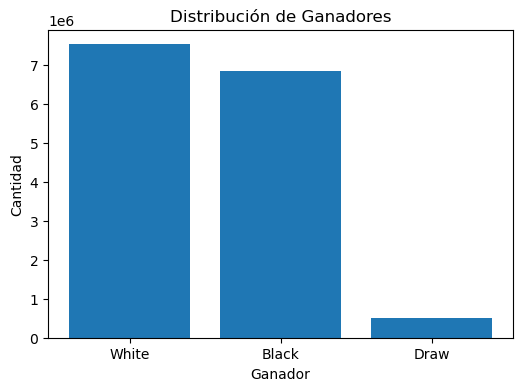

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.bar(winner_counts["Winner"], winner_counts["count"])
plt.title("Distribución de Ganadores")
plt.xlabel("Ganador")
plt.ylabel("Cantidad")
plt.show()

In [9]:
openings = (
    df.groupBy("Opening")
      .count()
      .orderBy("count", ascending=False)
      .limit(20)
      .toPandas()
)
openings

,Opening,count
0,Van't Kruijs Opening,395369
1,Modern Defense,282660
2,Horwitz Defense,277419
3,Scandinavian Defense: Mieses-Kotroc Variation,255099
4,Owen Defense,246100
5,French Defense: Knight Variation,225366
6,Sicilian Defense,199699
7,Hungarian Opening,198774
8,Caro-Kann Defense,197445
9,Sicilian Defense: Bowdler Attack,195716


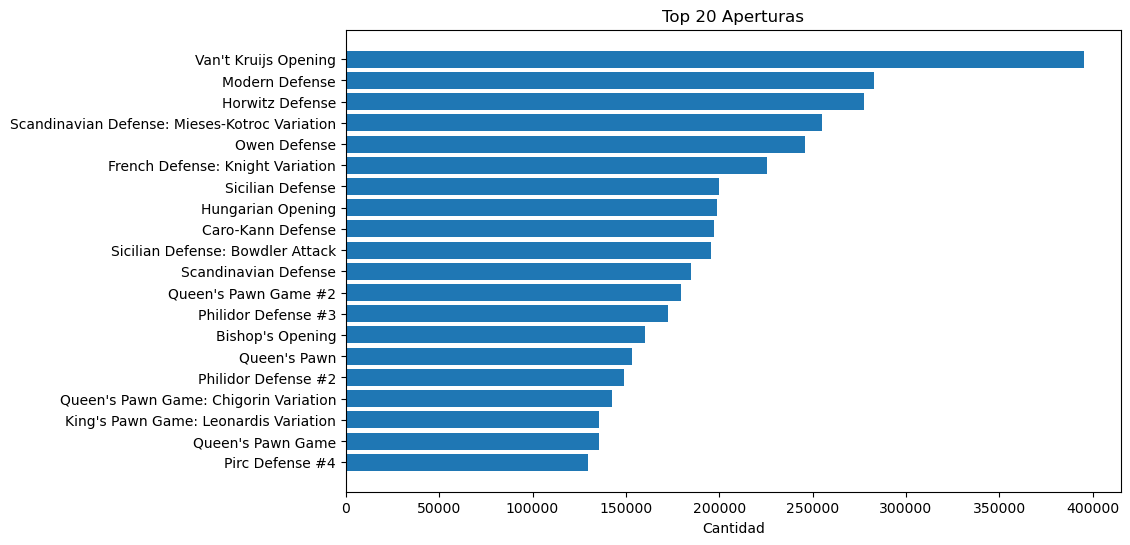

In [10]:
plt.figure(figsize=(10,6))
plt.barh(openings["Opening"], openings["count"])
plt.title("Top 20 Aperturas")
plt.xlabel("Cantidad")
plt.gca().invert_yaxis()
plt.show()

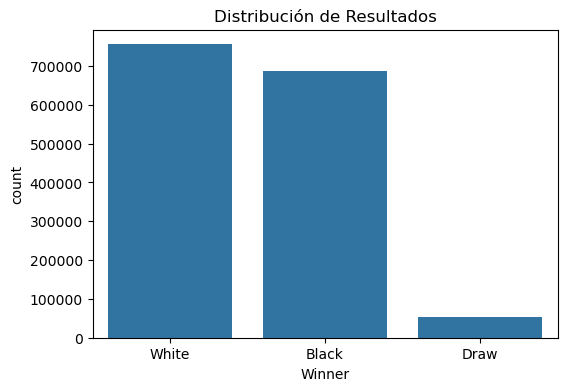

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pdf = df.select("Winner").sample(fraction=0.1, seed=42).toPandas()
plt.figure(figsize=(6,4))
sns.countplot(data=pdf, x="Winner")
plt.title("Distribución de Resultados")
plt.show()

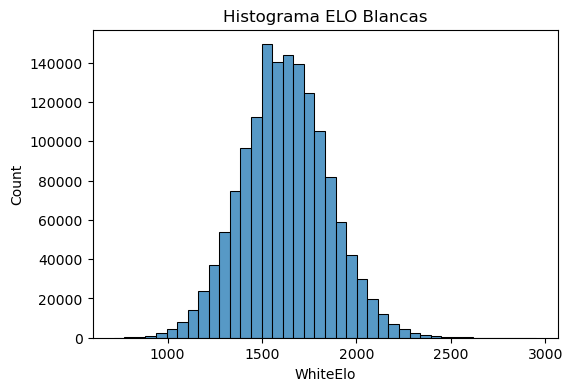

In [24]:
pdf = df.select("WhiteElo").sample(fraction=0.1, seed=42).toPandas()

plt.figure(figsize=(6,4))
sns.histplot(pdf["WhiteElo"], bins=40)
plt.title("Histograma ELO Blancas")
plt.show()

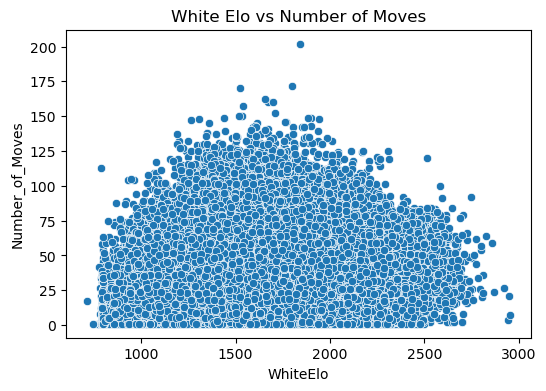

In [26]:
pdf = df.select("WhiteElo", "Number_of_Moves").sample(fraction=0.1, seed=42).toPandas()

plt.figure(figsize=(6,4))
sns.scatterplot(data=pdf, x="WhiteElo", y="Number_of_Moves")
plt.title("White Elo vs Number of Moves")
plt.show()